# Project: Investigate a Dataset (Stydy on no show up medical appointement¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset i've selected for analysis contain number of columns that sates the people who attended and not attended the medical appointement 
>**PatientId** :ID of the patient (Not useful in the analysis)
>
>**AppintementId**: ID of the appintement (Not Useful in the analysis)
>
>**Gender**: State whether the patinet a male or female expressed as 'M' or 'F' in 'str'
>
>**scheduldedday**: tells us on what day the patient set up their appointment in 'int'
>
>**appointementday**: State the date and time of the appointement day in 'int'
>
>**age**: Show the age of the patient in 'int'
>
>**neghbourhood**:  indicates the location of the hospital in 'str'
>
>**scholarship**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família if yes = 1 , no = 0
>
>**hipertension**: Explain whether the pateint suffer from a hipertension or not if yes = 1 , no = 0
>
>**diabetes**: Explain whether the pateint suffer from a diabetes or not if yes = 1 , no = 0
>
>**alcoholism**: Show whether the patient is addicted to alcohol if yes =1 , no =0
>
>**handcap**: show whethter the patient is handcap or not
>
>**sms_received**: state if the patient recieved a sms message or not
>
>**no_show**: state whether the patient went to appointment or not if show = 'No', if not show= 'Yes'

In [46]:
# Importing the libararies that we will need for the wrangling, analysis and visualising data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Q 1
### Does the gender affect the show up ?
## Q2
### Does the scholarship affect patient to show up ?
## Q3
### Does the alcoholism affect patient to show up ?
## Q4
### Does the hipertension affect patient to show up ?
## Q5
### Does the diabetes affect patient to show up ?
## Q6
### Does the handcap affect patient to show up ?
## Q7
### Does whether sms_recieved affect patient to show up ?
## Q8
### Does the delay between the scheduledday and appointmentday affect patient to show up ?
## Q9
### Is there a neighbourhood where more patient show up ?
## Q10
### Compare between gender with age mean and patients that showd or not
## Q11
###  Compare between gender with (handcap,alcoholism, and diabetes) mean and patients that showd or not

<a id='wrangling'></a>
## Data Wrangling


In [47]:
# First make a dataframe the file of the no show appointment that we will work on
# Then show the head of the data frame
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### First
let's seet the missing values in each column and the data type of each column

In [48]:
# Here using the this line to inspect for any missing values and show the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It seems that there is no missing values in the DF
### Second
let us have a describtion of the values in the DF

In [49]:
# we used the describe line to see (max, min and mean values for each column)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We found unclean data there is age which is less than 0 , and also in the handcap column there is values greater than 1 and it is supposed to only be 0 or 1 True or False

Check for the age which is less than zero

In [50]:
# show the row where pateints age is less than zero years
df.loc[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


then
#### Check for handcap which is greater than one`

In [51]:
# check for the rows where the handcap value is less greater than one as handcap is supposed to be true or false value
df.loc[df['Handcap']>1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
2213,3.423831e+09,5640766,F,2016-04-29T11:22:50Z,2016-04-29T00:00:00Z,29,VILA RUBIM,0,0,0,0,2,0,No
2214,2.754718e+12,5640760,M,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,No
2673,4.415275e+13,5589893,M,2016-04-15T13:06:05Z,2016-04-29T00:00:00Z,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,1.647280e+12,5647342,M,2016-05-02T13:24:36Z,2016-05-04T00:00:00Z,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,4.555225e+12,5689883,F,2016-05-12T09:10:28Z,2016-05-16T00:00:00Z,10,BENTO FERREIRA,0,0,0,0,2,0,No


### Data Cleaning

## First 
We are gonna drop non sueful columns [PatientId, AppointmentID]

In [52]:
# We dropped these two columns as we supplsed thwy are not useful
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)

## Second
Change the column names to lower case

In [53]:
# Change column names to lowercases and change the '-' to '_' to be easier in dealing with 
df.rename(columns= lambda x: x.strip().lower().replace('-','_'),inplace=True)

### Third
Drop the row in wich the value of the age is -1

In [54]:
# Dropping the rows where patients age less than 0 as it is unreasonable
df.drop(df[df['age']<0].index,inplace= True)

Since the rows of 'handcap' values are 199 rows i feel it will be better to assume that it was a mistake and meant to be a True value and not drop the rows
#### Fourth
Replace Values which is greater than 1 in the handcap column with the 1

In [55]:
# As we found the handcap number of rows have values greater than 1 are 199 rows,
# i see it is beteer to change these values with 1 as a true value
df['handcap']=df['handcap'].replace([2,3,4],1)

#### Fifth
Change the appointmentday to datetime type to do operations on it
Change the scheduledday to datetime type to do operations on it

In [56]:
# I changed the data type of these two column to datetime so i could subtract appointmentday from scheduledday
df['appointmentday']=pd.to_datetime(df['appointmentday'])
df['scheduledday']=pd.to_datetime(df['scheduledday'])

#### Sixth
Creat a new column called 'day_difference' which describe the difffernce betweent the appointmentday and scheduledday

In [57]:
df['day_difference']=df['appointmentday']-df['scheduledday']

Take a look of the new column

In [58]:
# Here i wanted to see what the values of the new column i created looks like
df['day_difference'].head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: day_difference, dtype: timedelta64[ns]

Make 'day_difference' column in hours

In [59]:
# I changed the column to hours value so it would be easier to deal with.
df['day_difference']=df['day_difference']/pd.Timedelta(hours=1)

Inspect 'day_difference' column after changing

In [60]:
# # Here i wanted to see what the values of the 'day_difference' i created looks like
df['day_difference'].head()

0   -18.635556
1   -16.140833
2   -16.317778
3   -17.491944
4   -16.123056
Name: day_difference, dtype: float64

now check that if there is a value less than -24 which mean that that appointmentdate is before the scheduledday

In [61]:
# Before doing any operation of the 'day_difference' column, i checked for unreasonable values whcih is less than 24 hours
# "It is unreasonable for the patient to have the aoopintmentday before scheduling"
df[df['day_difference']<-24]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_difference
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-34.864722
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-38.844722
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-37.732778
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-157.822222
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-30.849167


Let us drop these values as they are not reasonabel

In [62]:
# After finding that the number of rows are bad are only five i decided to remove them
df.drop(df[df['day_difference']<-24].index,inplace=True)

change the type of 'day_difference' type to integere

In [63]:
# Change the datatype of the 'day_difference' column into integer
df['day_difference']=df['day_difference'].astype(int)

Check the info

In [64]:
# chek for the number of row after cleaning and the atatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hipertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no_show           110521 non-null object
day_difference    110521 non-null int64
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.8+ MB


Change negative Values in 'day_difference' to positive

In [65]:
# change the negative values of the'day_difference' to positive values
df['day_difference']=df['day_difference'].abs()

Check if is there any negative values

In [66]:
# check if there any negative values in 'day_difference'
df[df['day_difference']<=0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_difference


Divide the the rows by 24 to make it days values not hours

In [67]:
# divide the 'day_difference' to by to 24 to make the values in days not in hors
df['day_difference']=df['day_difference']/24

Check the types of the data

In [68]:
# check for datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
gender            110521 non-null object
scheduledday      110521 non-null datetime64[ns]
appointmentday    110521 non-null datetime64[ns]
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hipertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no_show           110521 non-null object
day_difference    110521 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.8+ MB


Change the day_difference to integer

In [69]:
# change the 'day_difference' datatype to integer
df['day_difference']=df['day_difference'].astype(int)

Check the values of the 'day_difference'

In [70]:
# check for the unique values of the 'day_difference'
df['day_difference'].unique()

array([  0,   1,   2,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

Make a new column its name is 'sched_appoint_delay' based on the 'day_difference' values

In [71]:
# Make a new column ('sche_appoint_delay') built on the values of 'day_diffrence' 
# We make this column to see if affect the showup of the patients
bin_edges=[0,1,3,7,14,21,30,45,60,75,90,106,121,138,150,178]
bin_names=['0-1 day','1-3 days','within week','within 2 weeks','within 3 weeks','within month','within month and half','within 2 months','within 2 months and half','within 3 months','within 3 months and half','within 4 months','within 4 months and half','whithin 5 months','within 6 months']
df['sched_appoint_delay']=pd.cut(df['day_difference'],bin_edges,labels=bin_names)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does the gender affect the show up ?)

### First of all
#### Let us make mask and query of pateint who showed and which not

In [72]:
# Mask the data into 'show' and 'non_show' to be able to analyze it and see what affect patinets to showup in appointmentday
show=df.no_show=='No'
non_show=df.no_show=='Yes'
df_show=df.query('no_show=="No"')
df_no_show=df.query('no_show=="Yes"')

First Check which gender is more in the samples

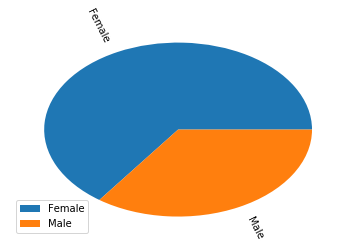

In [73]:
# First of all see the genders number differnece who are more males or females
gender=df.gender.value_counts()
plt.pie(gender,labels=['Female','Male'],rotatelabels=True)
plt.legend()
plt.show()

>It is obvious that the female are more than males by two thirds
>
>Now let us check which gender is more likely to showup

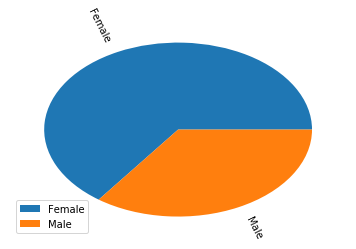

In [74]:
# second see the genders number differnece who are more to show males or females
gender_effect=df.gender[show].value_counts()
plt.pie(gender_effect,labels=['Female','Male'],rotatelabels=True)
plt.legend()
plt.show()

#### It is clear that the gender does not affect the show up as the females are more than males in the general sample and in the showup mask

### Research Question 2  (Does the scholarship affect patient to show up)

### First making a function to plot a pie, to not repeat a code

In [75]:
def display_pie(var,label):
    plt.pie(var,labels=['not {}'.format(label),'{}'.format(label)],autopct='%1.1f%%')
    plt.legend()
    return plt.show()

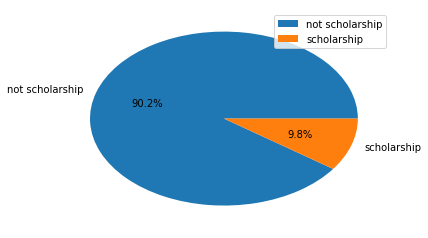

In [76]:
# Check which have more numbers are pateints who have scholarship or patients who don't
scholar=df.scholarship.value_counts()
display_pie(scholar,'scholarship')

>It is clear that from the sample that there is more people do not have scholarship
>
>Now let's see who will more likely to showup

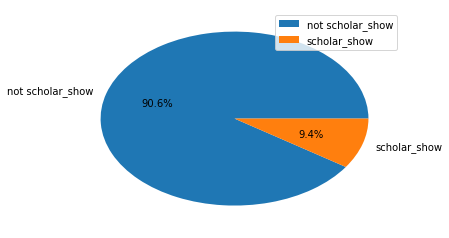

In [77]:
# check which number of patinets are more likely to show who have scholarship or who don't
scholar_effect=df.scholarship[show].value_counts()
display_pie(scholar_effect,'scholar_show')

#### It is clear that the scholarship does not affect the show up 
### Research Question 3  (Does the alcoholism affect patient to show up)

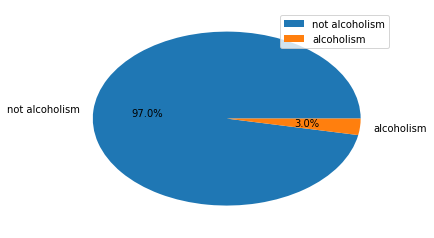

In [78]:
# Check which number of patinets who are alcohlims and who are not alcoholism
alcoholism=df.alcoholism.value_counts()
display_pie(alcoholism,'alcoholism')

It is clear that the non alcoholism is more than the alcoholism

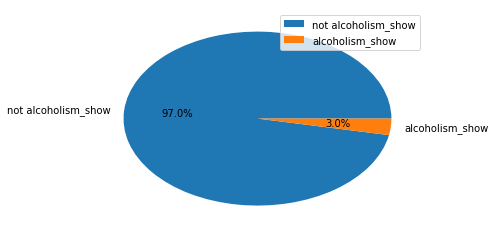

In [79]:
# Check for the number of patients are more likely to show the alcoholism or not alcoholism
alcoholism_show=df.alcoholism[show].value_counts()
display_pie(alcoholism_show,'alcoholism_show')

#### It is clear that the alcoholism does not affect the show up 
### Research Question 4  (Does the hipertension affect patient to show up)

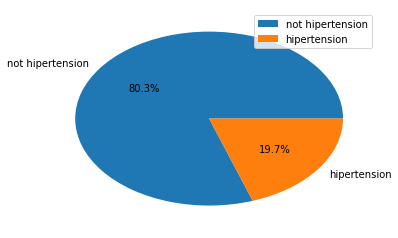

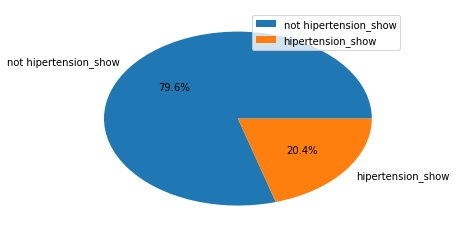

In [80]:
# Compare betweent the hipertension patents who showeup and the total patients who suffer from hipertension
hipertension=df.hipertension.value_counts()
display_pie(hipertension,'hipertension')
hipertension_show=df.hipertension[show].value_counts()
display_pie(hipertension_show,'hipertension_show')

#### It is clear that the hipertension does not affect the show up 
### Research Question 5  (Does the diabetes affect patient to show up)

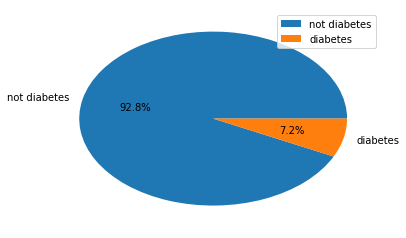

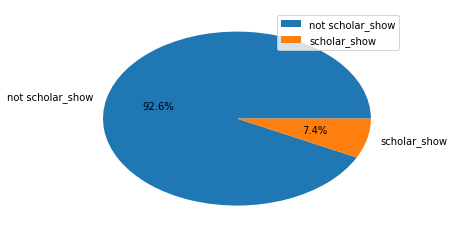

In [81]:
# Compare betweent the diabetic patents who showeup and the total patients who suffer from diabetes
diabetes=df.diabetes.value_counts()
display_pie(diabetes,'diabetes')
diabetes_show=df.diabetes[show].value_counts()
display_pie(diabetes_show,'scholar_show')

#### From the comparison between the two pies , it is obvious that diabetes doesnot affect the showup of patients
### Research Question 6  (Does the handcap affect patient to show up )

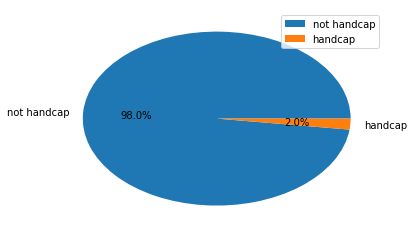

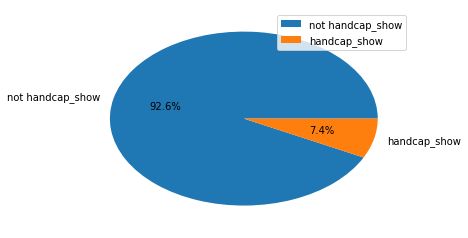

In [82]:
# Compare between the handcap patients who showup and the total patients who suffer from handcap
handcap=df.handcap.value_counts()
display_pie(handcap,'handcap')
handcap_show=df.diabetes[show].value_counts()
display_pie(handcap_show,'handcap_show')

#### From the comparison between the two pies , it is obvious that handcap doesnot affect the showup of patients
### Research Question 7  (Does whether sms_recieved affect patient to show up)

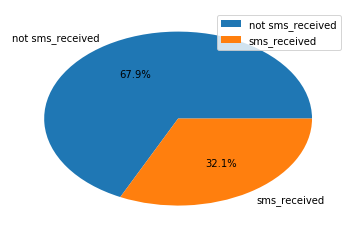

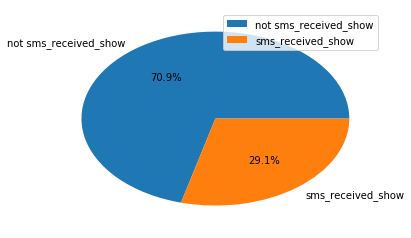

In [83]:
# Compare betweent the sms_receieved patients who showup and the total patients who recieved sms
received=df.sms_received.value_counts()
display_pie(received,'sms_received')
received_show=df.sms_received[show].value_counts()
display_pie(received_show,'sms_received_show')

#### From the comparison between the two pies , it is obvious that receiving sms message doesnot affect the showup of patients
### Research Question 8 (Does the delay between the scheduledday and appointmentday affect patient to    showup)

In [84]:
# check for common the delay between the schedledday and appointmentday
sched=df.sched_appoint_delay.value_counts()
sched

within week                 14552
within 2 weeks              11196
within 3 weeks               8544
1-3 days                     8027
within month                 7996
0-1 day                      6725
within month and half        5954
within 2 months              1792
within 2 months and half     1393
within 3 months               406
within 6 months                55
within 3 months and half       47
within 4 months                32
within 4 months and half       17
whithin 5 months               10
Name: sched_appoint_delay, dtype: int64

In [85]:
# check for common the delay between the schedledday and appointmentday between the patients who showup
sched_show=df.sched_appoint_delay[show].value_counts()
sched_show

within week                 10700
within 2 weeks               7700
1-3 days                     6152
within 3 weeks               5781
within month                 5380
0-1 day                      5123
within month and half        3889
within 2 months              1217
within 2 months and half      989
within 3 months               289
within 6 months                38
within 3 months and half       34
within 4 months                30
within 4 months and half       10
whithin 5 months                5
Name: sched_appoint_delay, dtype: int64

#### It is obvious that the delay between the schedledday and appointmentday is almost the same between the total number of the patinets and the patinets who showup

In [86]:
# Using these lines to relad the matplotlib as the library didn't work normally
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

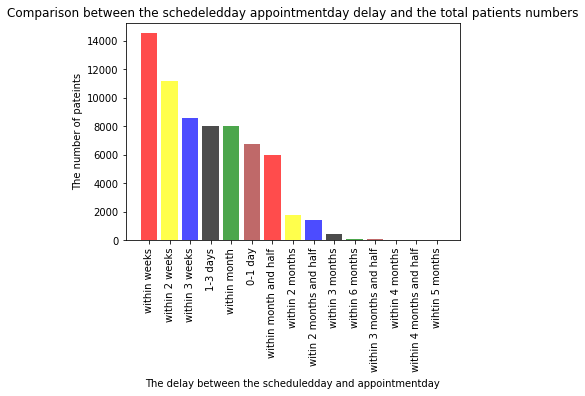

In [87]:
# Here we decided to use the graph to show the common delay between the schedday and appointday
# on the total number of patinets
sched_bar=plt.bar(np.arange(len(sched)),sched,label=('Sched_appoint_delay'),alpha=0.7,color=['red','yellow','blue','black','green','brown'],tick_label=['within weeks','within 2 weeks','within 3 weeks','1-3 days','within month','0-1 day','within month and half','within 2 months','witin 2 months and half','within 3 months','within 6 months','within 3 months and half','within 4 months',' within 4 months and half','wihtin 5 months'])
plt.xticks(rotation=90)
plt.title('Comparison between the schedeledday appointmentday delay and the total patients numbers')
plt.xlabel('The delay between the scheduledday and appointmentday')
plt.ylabel('The number of pateints')
plt.show()

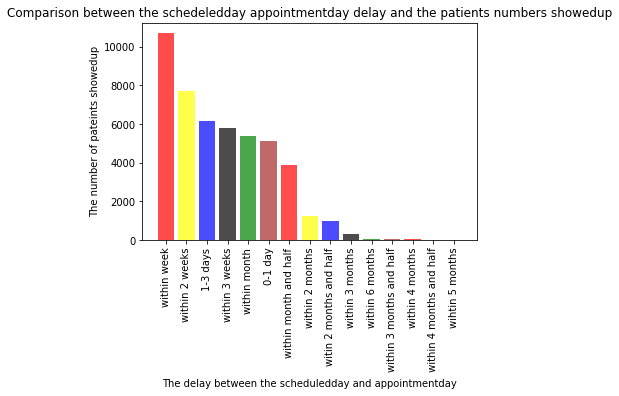

In [88]:
# Here we decided to use the graph to show the common delay between the schedday and appointday
# on the patinets who showup
plt.bar(np.arange(len(sched_show)),sched_show,label=('Sched_appoint_delay'),alpha=0.7,color=['red','yellow','blue','black','green','brown'],tick_label=['within week','within 2 weeks','1-3 days','within 3 weeks','within month','0-1 day','within month and half','within 2 months','witin 2 months and half','within 3 months','within 6 months','within 3 months and half','within 4 months',' within 4 months and half','wihtin 5 months'])
plt.xticks(rotation=90)
plt.title('Comparison between the schedeledday appointmentday delay and the patients numbers showedup')
plt.xlabel('The delay between the scheduledday and appointmentday')
plt.ylabel('The number of pateints showedup')
plt.show()

#### From the comparison between the two bar charts , it is obvious that the delay between the sheduledday and appointmentday doesnot affect the showup of patients
#### Most of the patient make the appointment ('within week', 'within 2 weeks', 'within 3 weeks', 'within month','0-1 day' , '1-3 days', 'within month and half') after the scheduling
#### It is the same thing with patient that show make the appointment after the scheduling day within the same ranges
### Research Question 9  (Is there a neighbourhood where more patients show up)

In [89]:
# The 20 negbourhood who has the most number of patients
df.neighbourhood.value_counts().nlargest(20)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4430
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3131
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
SANTO ANTÔNIO        2744
SANTO ANDRÉ          2571
CARATOÍRA            2565
JABOUR               2509
SÃO PEDRO            2448
ILHA DO PRÍNCIPE     2266
NOVA PALESTINA       2264
ANDORINHAS           2262
DA PENHA             2217
ROMÃO                2214
Name: neighbourhood, dtype: int64

In [90]:
# The 20 negbourhood who has the most number of patients showup
df.neighbourhood[show].value_counts().nlargest(20)

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
CENTRO               2631
ITARARÉ              2591
TABUAZEIRO           2559
SANTO ANTÔNIO        2262
BONFIM               2223
JESUS DE NAZARETH    2157
SANTO ANDRÉ          2063
JABOUR               2058
CARATOÍRA            1974
SÃO PEDRO            1933
NOVA PALESTINA       1862
DA PENHA             1788
ANDORINHAS           1741
ROMÃO                1740
ILHA DO PRÍNCIPE     1734
Name: neighbourhood, dtype: int64

#### The top 20 neighbours which has the highest number of paitents , are almost the same top 20 neighbours which has the highest number of paitents who showup

### Research Question 10  (What is the ages that are more likely to show up )

In [91]:
# show the top 10 ages of patients
df.age.value_counts().nlargest(10)

0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1628
59    1624
2     1618
50    1613
Name: age, dtype: int64

In [92]:
# show the top 10 ages of patients who showup
df.age[show].value_counts().nlargest(10)

0     2900
1     1858
52    1449
56    1372
2     1366
59    1357
49    1354
53    1332
57    1325
50    1322
Name: age, dtype: int64

In [93]:
# Here we decided to express the mean age of the total patients, patients showup and patients not
x1=df.age.mean()
x2=df.age[show].mean()
x3=df.age[non_show].mean()
print('The average age of the total number of patients{}'.format(x1))
print('The average age of patients showup{}'.format(x2))
print('The average age of patients didn\'t showup{}'.format(x3))

The average age of the total number of patients37.08938572759928
The average age of patients showup37.790504154999034
The average age of patients didn't showup34.31787218786412


In [94]:
# Check fo the average, min, max and iterquartile ages of the patients
df.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

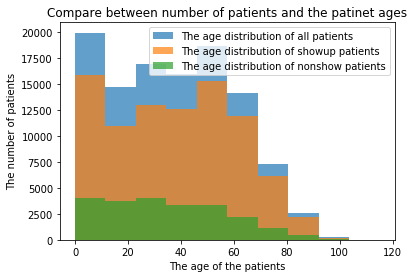

In [95]:
# Histogram of ages of all the patients that participat in the sudy combined with histogram of ages
# of patients showup and patietns who didn't show
plt.hist(df.age,alpha=0.7,label=('The age distribution of all patients'))
plt.hist(df.age[show],alpha=0.7,label='The age distribution of showup patients')
plt.hist(df.age[non_show],alpha=0.7,label=('The age distribution of nonshow patients'))
plt.title('Compare between number of patients and the patinet ages')
plt.xlabel('The age of the patients')
plt.ylabel('The number of patients')
plt.legend()

#### From the number the average age of all the patients is 37, the average age of patents who show up is also 37 and the average age nonshow patients is 34 
#### The histogram variate with the same rate in the all patients, showup patients and nonshow patients 
#### That is mean that the age of the patients doesnot affect the show of the patients

## Q11
### Compare between gender with age mean and patients that showd or not

In [96]:
# Grouping the show patients by gender and describe their age
df_show.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,57245.0,39.591126,22.342413,0.0,22.0,40.0,57.0,115.0
M,30962.0,34.461372,24.734056,0.0,10.0,34.0,55.0,100.0


In [97]:
# Grouping the nonshow patients by gender and describe their age
df_no_show.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,14591.0,36.161264,21.182334,0.0,20.0,34.0,52.0,115.0
M,7723.0,30.835168,22.973429,0.0,10.0,28.0,49.0,97.0


#### The interquartiles of ages in the patients that showed are more by (2-6 years) of the patitns that didnot show in both genders 
#### From the describtion of the age in both genders pateints who showup and who didn't show, the numbers tell that the age is almost the same in both genders patietns who showup and who didn't show

## Q12
###  Compare between gender with (handcap,alcoholism, and diabetes) mean and patients that showd or not

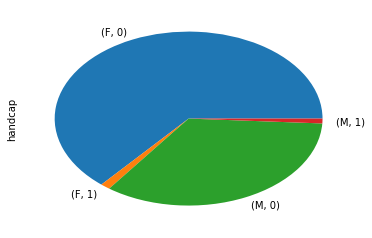

In [98]:
## Grouping the show patients by gender and count the handcap among them
df_show.groupby('gender')['handcap'].value_counts().plot(kind='pie')

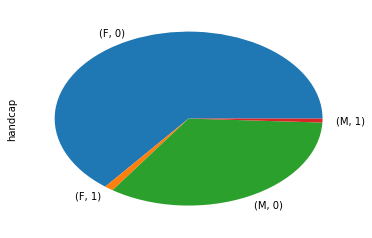

In [99]:
## Grouping the non_show patients by gender and count the handcap among them
df_no_show.groupby('gender')['handcap'].value_counts().plot(kind='pie')

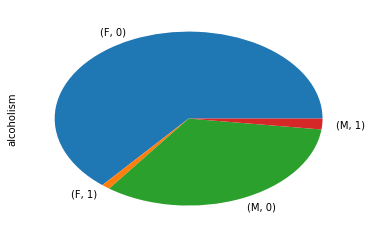

In [100]:
## Grouping the show patients by gender and count the alcoholism among them
df_show.groupby('gender')['alcoholism'].value_counts().plot(kind='pie')

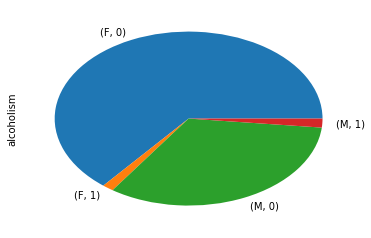

In [101]:
## Grouping the non_show patients by gender and count the alcoholism among them
df_no_show.groupby('gender')['alcoholism'].value_counts().plot(kind='pie')

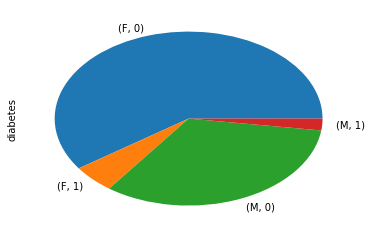

In [102]:
## Grouping the show patients by gender and count the diabetic among them
df_show.groupby('gender')['diabetes'].value_counts().plot(kind='pie')

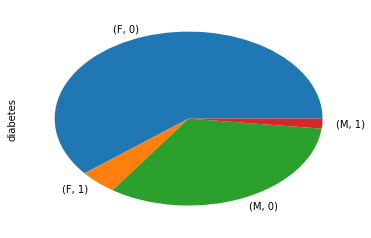

In [103]:
## Grouping the non_show patients by gender and count the handcap among them
df_no_show.groupby('gender')['diabetes'].value_counts().plot(kind='pie')

#### I have grouped the showup patients and non_show by gender and the chronic deiseases 'hipertension', 'diabetes','handcap', and 'alcoholism')
#### Ifound out that there is no relation between gender, chronic diseases and patients that showup or not 

<a id='conclusions'></a>
## Conclusions
After answering the questions that i asked in the introduction i came up with a conclusion that, there is no affect from the data given like ("sms_received:","handcap", "alcoholism", "diabetes", "hipertension", "scholarship" , "neghbourhood", "age") on the showup , as all the results of show up patinets are almost the same like the non_show patients and also like the all patinets data.
## Limitatins
>I have reached a conclusion that non of the data provided is enough to show why smoe people attend the appointment and some peopple not
>
>I think the problem is because most of the sample is from females which make it a littlebit harder to distinguish between gender
>
> May be the sample is too small so that there is no enogh data the we could come from it with results
>
> I recommend that we ask help of expertise in health and also we could gather more various data

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0